# **Stroke Prediction EDA**

### The lifecycle or workflow of EDA on a dataset 
- Understanding the Problem Statement
- Data Collection
- Data Inspection
- Data Cleaning
- Data Visualization or Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## **1. Understanding the Problem Statement**
Stroke is a leading cause of death and disability worldwide, and early prediction of stroke risk can help prevent or reduce the severity of the disease. However, predicting stroke risk is a challenging task due to the complex interplay of various risk factors, such as age, gender, lifestyle, and medical history. Existing stroke prediction models have limitations in terms of accuracy, interpretability, and generalizability, and there is a need for more robust and reliable models.

## **2. Data Collection**

- **Dataset Source:** [Kaggle Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

- **Dataset Information:** 
  - 12 features
  - 5110 rows

- **Feature Explanation:**
Certainly, here's the feature explanation in a table format using Markdown:

  | Feature          | Explanation                                             |
  |------------------|---------------------------------------------------------|
  | **id**           | Identifier                                              |
  | **gender**       | Male, Female, or Other                                 |
  | **age**          | Age                                                     |
  | **hypertension** | 0 (No hypertension) or 1 (Hypertension)                |
  | **heart_disease**| 0 (No heart disease) or 1 (Heart disease)              |
  | **ever_married** | Yes or No                                              |
  | **work_type**    | Job                                                    |
  | **Residence_type**| Rural or Urban                                         |
  | **avg_glucose_level** | Average glucose level                              |
  | **bmi**          | Body Mass Index                                        |
  | **smoking_status**| Smoking                                              |
  | **stroke**       | 1 (Had a stroke) or 0 (No stroke)                     |

This dataset is intended for building a predictive model to determine stroke risk based on these attributes.

### 2.1 Importing Dependencies and Dataset

In [1]:
# Importing necessary dependencies
import pandas as pd

In [2]:
# import csv file
df = pd.read_csv('dataset\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **3. Data Inspection**

### 3.1 Checking Data Type and Unique Value

In [3]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Defining the categorical and numerical feature
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O'] + ['hypertension', 'heart_disease', 'stroke']
numeric_features = [feature for feature in df.drop('id', axis=1).columns if feature not in categorical_features]

# Printing the numerical and categorical feature
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 3 numerical features : ['age', 'avg_glucose_level', 'bmi']
We have 8 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']


In [5]:
# Get unique values for each feature
unique_values = df.nunique()

# Print the unique values for each feature
print(f"Unique values for each feature:\n{unique_values}")

Unique values for each feature:
id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [7]:
# Checking the values of each unique value on the categorical feature
for feature in categorical_features:
    print(f"We have {df[feature].nunique()} unique value on {feature}:\n{df[feature].unique()}\n")

We have 3 unique value on gender:
['Male' 'Female' 'Other']

We have 2 unique value on ever_married:
['Yes' 'No']

We have 5 unique value on work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

We have 2 unique value on Residence_type:
['Urban' 'Rural']

We have 4 unique value on smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']

We have 2 unique value on hypertension:
[0 1]

We have 2 unique value on heart_disease:
[1 0]

We have 2 unique value on stroke:
[1 0]



### 3.2 Checking Duplicate Data and Missing Value

In [8]:
# Check total feature in data
print(f"Total featrues in the dataset: {df.shape[1]}")
# Check total row in data
print(f"Total row in the dataset: {df.shape[0]}")
# Check Duplicates
print(f"Total duplicate on dataset: {df.duplicated().sum()}")


Total featrues in the dataset: 12
Total row in the dataset: 5110
Total duplicate on dataset: 0


In [9]:
# Check Missing value
print(f"Missing value on each feature:\n{df.isna().sum()}")

Missing value on each feature:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### 3.3 Statistic of Data and Outliers

In [10]:
# Checking the statictic of data
df[['avg_glucose_level', 'bmi']].describe() # not include id

,avg_glucose_level,bmi
count,5110.000000,4909.000000
mean,106.147677,28.893237
std,45.283560,7.854067
min,55.120000,10.300000
25%,77.245000,23.500000
50%,91.885000,28.100000
75%,114.090000,33.100000
max,271.740000,97.600000


In [11]:
def potential_outliers(data: pd.DataFrame, column: str):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    potential_outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)]
    return potential_outliers.shape[0]


In [12]:
# Check if the data have outliers using function that we define before
print(f"Feature avg_glucose_level have: {potential_outliers(df, 'avg_glucose_level')} potential outliers")
print(f"Feature bmi have: {potential_outliers(df, 'bmi')} potential outliers")

Feature avg_glucose_level have: 627 potential outliers
Feature bmi have: 110 potential outliers


### 3.4 Checking Imbalance of Data

In [13]:
# Checking label data have the same ratio or not
label_distribution = df['stroke'].value_counts()

# check the class distribution
print(label_distribution)

# Calculate class proportions
label_proportions = label_distribution / len(df)

# check how much proportion on data
print(f"\n{label_proportions}")

stroke
0    4861
1     249
Name: count, dtype: int64

stroke
0    0.951272
1    0.048728
Name: count, dtype: float64


### Summary of Data Inspection Step

During the data inspection phase, the following key observations were made:

1. **Missing Value in BMI:**
   - The 'BMI' (Body Mass Index) feature has missing values that need to be addressed in the data cleaning step.
   - Since the 'BMI' feature has outliers, a way to impute the missing value are using median.

2. **Data Type Issues:**
   - The data type of some categorical features is currently represented as 'int64'.
   - These categorical features should be appropriately encoded as categorical data types.

3. **Class Imbalance:**
   - There is a significant class imbalance in the target variable ('stroke').
   - The negative class (no stroke) accounts for approximately 95% of the dataset, while the positive class (stroke) is underrepresented.
   - Addressing this imbalance may be necessary to avoid model bias and improve predictive accuracy.

3. **Outliers Data**
   - There is an outliers on the feature 'BMI' and 'avg_glucose_level'.
   - We can handling this with standardization (Z-Score Scaling) at data preprocessing step.

These findings will guide the data cleaning, preprocessing, and potential class imbalance handling steps in the data analysis and modeling process.


## **4. Data Cleaning**

### 4.1 Handling Missing Value

In [14]:
# Impute missing values with the median
df['bmi'].fillna(df['bmi'].median(), inplace = True)

# Checking if the still have missing value
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 4.2 Handling Data Type Issue

In [23]:
# Change feature into category type
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

# Check if the type already change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   category
 4   heart_disease      5110 non-null   category
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 200.9 KB


## **5. Data Visualization or Exploratory Data Analysis**

In [30]:
# Importing necessary dependencies
import seaborn as sns
import matplotlib.pyplot as plt

### 5.1 Univariate Analysis

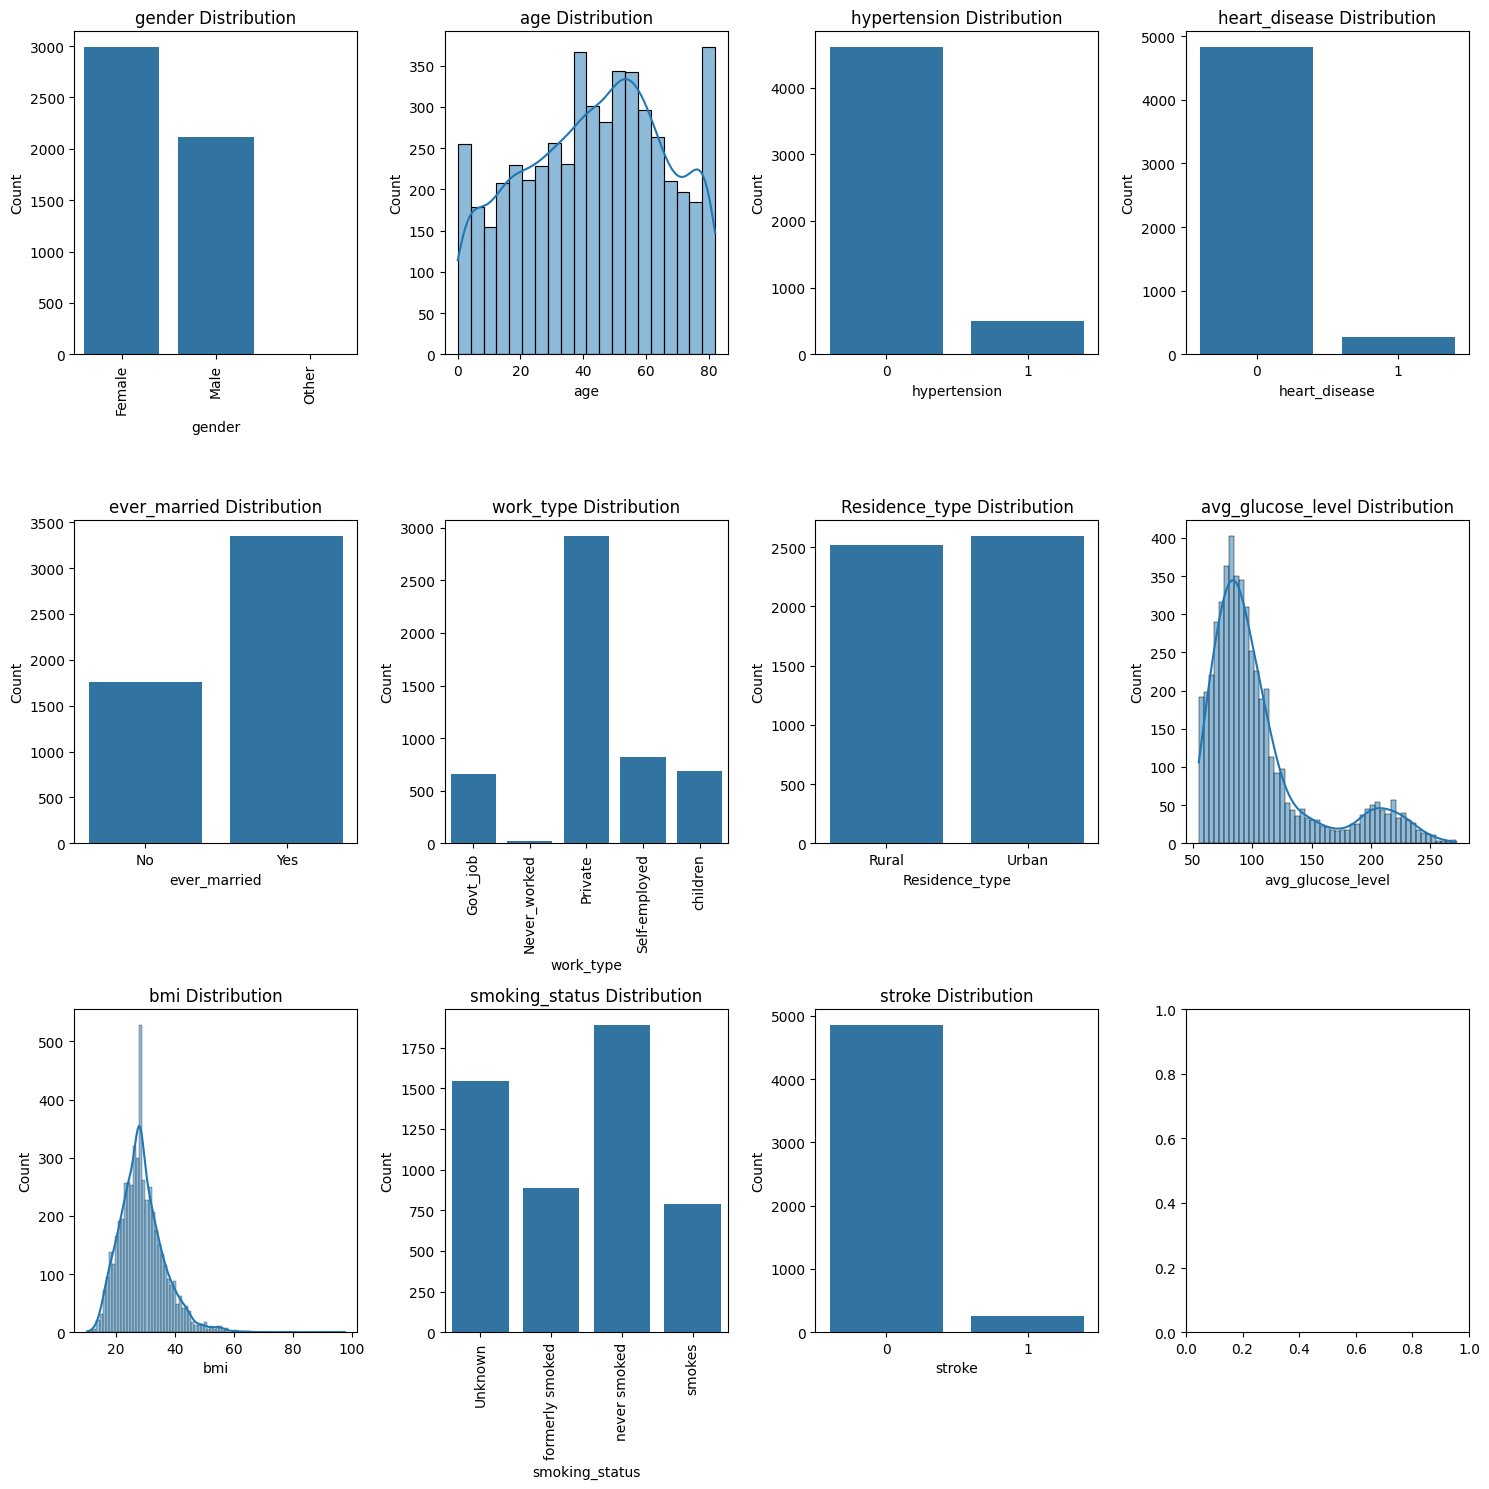

In [160]:
columns_univariate = df.columns.to_list()

# Removing feature that didnt bring insight
columns_univariate.remove('id')

# Set the number of subplots per row
num_subplots_per_row = 4

# Calculate the number of rows needed
num_rows = (len(columns_univariate) - 1) // num_subplots_per_row + 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_subplots_per_row, figsize= (15, 5*num_rows))

# Flatten the 2D array of subplots to make indexing easier
axs = axs.ravel()

# Loop through the columns and create univariate visualizations
for i, column in enumerate(columns_univariate):
    if df[column].nunique() < 10:
        sns.countplot(data = df, x = column, ax = axs[i])
        if df[column].nunique() > 2:
            axs[i].xaxis.set_tick_params(rotation=90) 
    else:      
        sns.histplot(data = df, x = column, kde = True, ax = axs[i])
    axs[i].set_title(f"{column} Distribution")
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

### 5.2 Multivariate Analysis

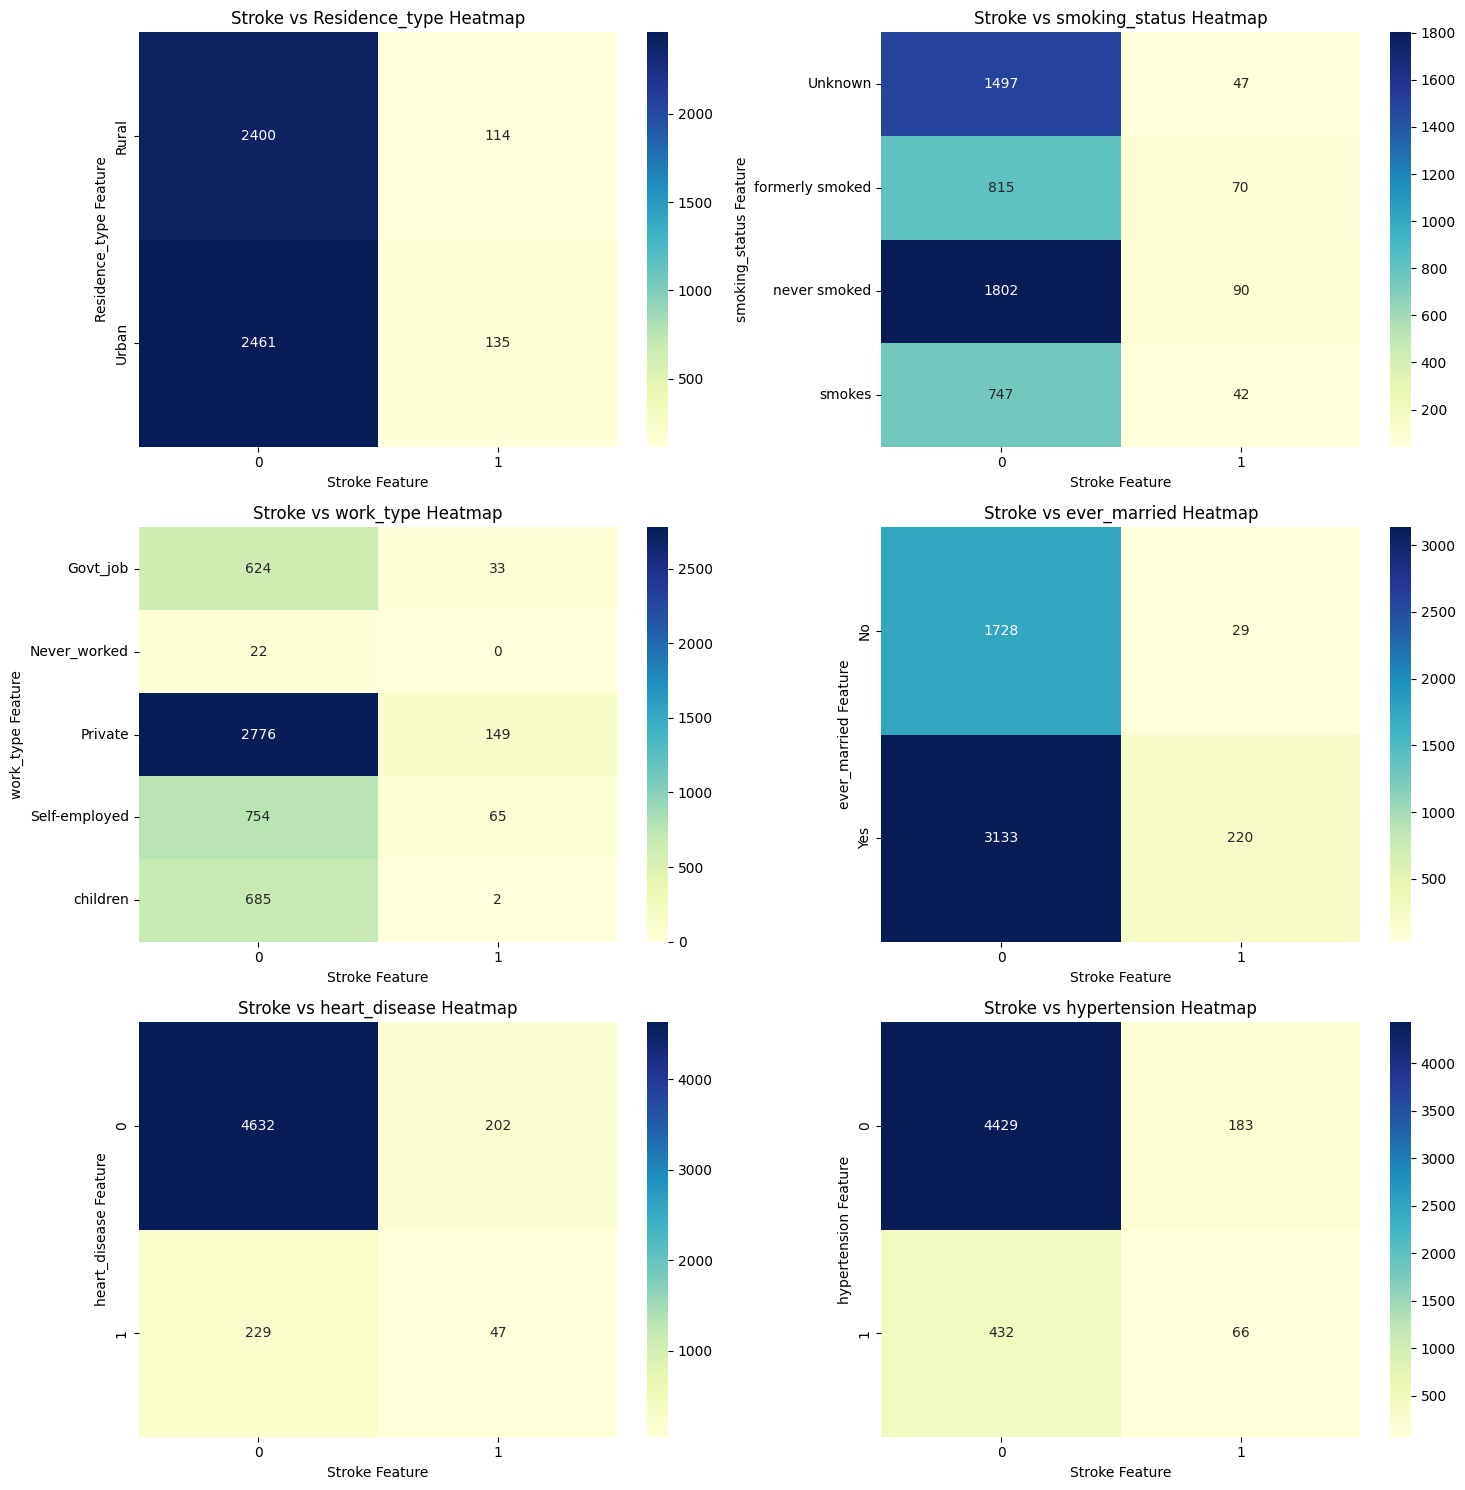

In [193]:
# Set feature that we would to analize
feature_cross_tab = ['Residence_type', 'smoking_status', 'work_type' ,'ever_married', 'heart_disease', 'hypertension']

# Set the number of subplots per row
num_subplots_per_row = 2

# Calculate the number of rows needed
num_rows = (len(feature_cross_tab) - 1) // num_subplots_per_row + 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_subplots_per_row, figsize = (15, 5*num_rows))

# Flatten the 2D array of subplots to make indexing easier
axs = axs.ravel()

for i, column in enumerate(feature_cross_tab):
    # Create a cross-tabulation (contingency table) of two categorical variables
    cross_tab = pd.crosstab(df[column], df['stroke'])

    # Create a heatmap with counts
    sns.heatmap(cross_tab, annot=True, fmt = 'd',cmap="YlGnBu", ax= axs[i])

    # Customize labels and title
    axs[i].set_xlabel('Stroke Feature')
    axs[i].set_ylabel(f'{column} Feature')
    axs[i].set_title(f'Stroke vs {column} Heatmap')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

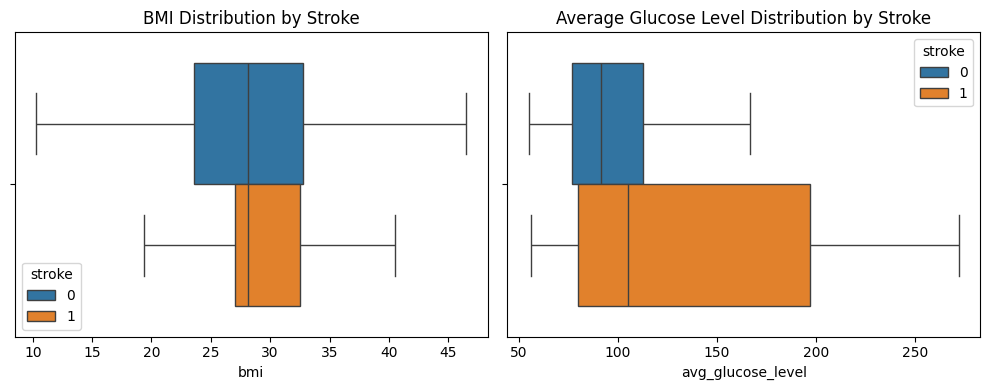

In [186]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.boxplot(df, x ='bmi',  hue = 'stroke', showfliers=False, ax=axs[0])
axs[0].set_title('BMI Distribution by Stroke')

sns.boxplot(df, x='avg_glucose_level', hue = 'stroke', showfliers=False, ax = axs[1])
axs[1].set_title('Average Glucose Level Distribution by Stroke')

plt.tight_layout()

plt.show()


## **Saving Dataset**

In [199]:
df.to_csv('dataset\healthcare-dataset-stroke-data-cleaned.csv')